# keras --> 프로그래밍이 간단해진다. 

- Backend - tensorflow
          - CNTK
          - Theamo
            
- constant , variables , placeholder --> 행렬연산
- loss function , activation, optimizer
- keras는 텐서플로의 과정을 내포시켜 놓았다. 
- Dense --> 가중치가 자동으로 만들어지는 함수 ( tensorflow 안에서 ) --> variable을 선언할 필요 x 등등...


- keras --> add를 통해서 layer를 추가
        --> retrun 받는 과정을 생략한다. 체이닝을 할 필요가 xx
        --> 이전 layer에서 계산된 결과가 자동으로 들어간다. 
        --> 가중치를 선언할 필요가 없다 위에서 설명할때의 Dense 처럼. 
<span style = "color:red">--> @@중@@ 출력 차수만을 지정해주면 이전 레이어에서 들어온 값과 출력 차수를 계산해서 다음 레이어로 보내준다 @@요@@</span>
- keras model을 만드는 방법  --> seqential
                             --> functional  (multi input multi output)
                             --> model  --> 클래스 베이스로 프로그래밍 하게 만들어져 있다. 
                            
- loss , activation , optimizer를 compile의 매개 변수로 넣어줘야한다. 
- Data 입력 , epoch, batch_size, validation   를  fit의 매개변수로 넣어줘야한다. 
- evaluate --> predict 를 이용해서  프로그램을 만들수 있다. 

- keras와 sklearn이 같이 연결되어 있음. --> classifer 와 regressior를 사용(?) --> 분류와 예측. 
- pre training --> transfer learning --> 가중치가 어느정도 학습이 되어 져 있음. 
- 이걸 케라스에서는 application 으로 들어와 있다. 
- RNN도 10단계 이상을 진행하면 기울기 손실이 생길수 밖에 없다.--> 그래서 나온게 LSTM이다. --> LSTM을 바꾼게 --> GRU(updata, reset)()

- seq2seq가 효율이 별로 좋지 않아서 만든게 attention이더라. 
- attention --> 가중치 3개를 가지고 만든것.
- NMT == seq2seq + attention
- transformer == (?) seq2seq
- BERT (bi-directional embedding Transformer)
-
-
- Image -> openCv
- sound -> libosa
- text -> gensim
- 이미지에서는 GAN 이 트렌드 , 텍스트에서는 BERT가 트렌드이다. 


- tensorflow를 배우는 이유--> 뭔가 작업을 자동화 시키기 위해서. 
### 예를 들어서. 
- 공장에서 나오는 기계 소리를 분석해서 어떤 소리가 들리면 이건 일주일 후에 고장난다라는 예측을 하자. 










In [57]:
#Dense망은 FFNN을 만들때 사용한다. 

from keras.models import Sequential   # keras안에 models안에 서브패키지에 있다. 
from keras.layers import Dense       # layers에서 모델을 구성한다. 
from sklearn.datasets import make_regression 
from sklearn.preprocessing import MinMaxScaler
# 신경망에서는 정규화 시켜줘야한다. 
X, y = make_regression(n_samples = 100, n_features = 2, noise =0.1, random_state = 42)
# X = 100x 2 y = 100개가 나온다. 
# 회귀하고있음. 

scalarX, scalarY = MinMaxScaler(), MinMaxScaler()  # 데이터가 다르고 데이터의 사이즈( 값의 범위)가 다르기 때문에 두개로 만들어준다. 

scalarX.fit(X)  
scalarY.fit(y.reshape(100,1))  # 위에서 열로 100개가 만들어졌기 때문에 행으로 만들어 주기 위해서. 
X = scalarX.transform(X)
y = scalarY.transform(y.reshape(100,1))


# 케라스의 모델을 시작한다. 

# Dense 망을 시작한다. 
model = Sequential()
model.add(Dense(4, input_dim = 2, activation = 'relu'))  # 여기서 4는 출력 차수로 지정한다. 
# 인풋데이터 100X2 일때 출력이 4인데  가중치를 맞춰줄려고 2x4로 만들어준다 따라서 여기서 100x2, 2X4가 된다 --> 100x4의 형태. 

model.add(Dense(4, activation = 'relu'))
# 앞 layer의 값 100X 4가 들어오고  가중치는 100X4 , 4X4, 즉 100x4로 출력된다. 
# 여기까지 layer Depth = 2
model.add(Dense(1, activation = 'linear'))
# 100X4, 4X1 100X1로 예측된다. 
model.compile(loss = 'mse', optimizer = 'adam')  # tensorflow 모델을 변환한다. 여기까지 모델을 만들어놓고 
# 회귀에서는 mse , 분류에서는 cross-entropy, Gan에서는 KL-divergence
model.fit(X,y, epochs= 1000, verbose = 0)  # 여기에서 fit해서 작동 시킨다. 
# 안에서 2중 for 문이 작동한다. 
# X,y == 인풋데이터 , 
Xnew, a = make_regression(n_samples = 3, n_features = 2, noise = 0.1, random_state = 42)
Xnew = scalarX.transform(Xnew)
ynew = model.predict(Xnew)
for i in range(len(Xnew)):
    print("입력데이터 = %s, 예측결과 = %s" % (Xnew[i], ynew[i])) 

입력데이터 = [0.72514063 0.74570817], 예측결과 = [0.46557802]
입력데이터 = [0.5294337  0.37245742], 예측결과 = [0.46557802]
입력데이터 = [0.69163493 0.39282232], 예측결과 = [0.46557802]


In [58]:
from keras.models import Sequential # 입력이 하나고 output도 하나인 망
from keras.layers import Dense
import numpy 
numpy.random.seed(7)
datasets = numpy.loadtxt('pima.data', delimiter = ",")
X = datasets[:, 0:8]  # 8개까지가 독립변수이고 
Y = datasets[:,8]   # 9번쨰가 독립 변수임. 
model = Sequential()
model.add(Dense(12, input_dim = 8,kernel_initializer = 'uniform', activation = 'relu'))
# ? X 8, 8X12 ==?X12                     # 초기화 방법 --> 균등분포
model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
# ?X12 12X8 ==> ?X8
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# ?X 8  8X1 ==> ? x1 분류           
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# metics == accuracy는 정확도를 측정하겠다라는 뜻임 즉 내가 보고싶은게 accuracy이다 라는뜻이다. 
history = model.fit(X,Y, epochs = 150,validation_split = 0.33, batch_size = 10)
# 데이터를 분리 입력할때 (train, test)  이놈 까지도 과적합 되는 현상이 생긴다.
# 따라서 그 안에서도 과적합을 방지하기 위한 validation 을 만들어줘야한다. 
scores = model.evaluate(X,Y)
print('\n%s: %.2f%%'  %(model.metrics_names[1], scores[1]*100))
# 모델의 메트릭스의 이름을 지정하고 그 이름의 점수 값을 지정한다. 


Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 877us/step - loss: 0.6796 - accuracy: 0.6401 - val_loss: 0.6586 - val_accuracy: 0.6732
Epoch 2/150
514/514 [==============================] - 0s 124us/step - loss: 0.6687 - accuracy: 0.6401 - val_loss: 0.6535 - val_accuracy: 0.6732
Epoch 3/150
514/514 [==============================] - 0s 120us/step - loss: 0.6617 - accuracy: 0.6401 - val_loss: 0.6518 - val_accuracy: 0.6732
Epoch 4/150
514/514 [==============================] - 0s 116us/step - loss: 0.6541 - accuracy: 0.6401 - val_loss: 0.6462 - val_accuracy: 0.6732
Epoch 5/150
514/514 [==============================] - 0s 120us/step - loss: 0.6460 - accuracy: 0.6401 - val_loss: 0.6375 - val_accuracy: 0.6890
Epoch 6/150
514/514 [==============================] - 0s 130us/step - loss: 0.6400 - accuracy: 0.6401 - val_loss: 0.6257 - val_accuracy: 0.6929
Epoch 7/150
514/514 [==============================] - 0s 118us/step - loss: 0.6314 

Epoch 57/150
514/514 [==============================] - 0s 118us/step - loss: 0.5398 - accuracy: 0.7237 - val_loss: 0.5546 - val_accuracy: 0.7441
Epoch 58/150
514/514 [==============================] - 0s 116us/step - loss: 0.5320 - accuracy: 0.7335 - val_loss: 0.5614 - val_accuracy: 0.7047
Epoch 59/150
514/514 [==============================] - 0s 116us/step - loss: 0.5413 - accuracy: 0.7257 - val_loss: 0.5412 - val_accuracy: 0.7480
Epoch 60/150
514/514 [==============================] - 0s 134us/step - loss: 0.5353 - accuracy: 0.7276 - val_loss: 0.5490 - val_accuracy: 0.7402
Epoch 61/150
514/514 [==============================] - 0s 136us/step - loss: 0.5331 - accuracy: 0.7412 - val_loss: 0.5492 - val_accuracy: 0.7480
Epoch 62/150
514/514 [==============================] - 0s 126us/step - loss: 0.5373 - accuracy: 0.7276 - val_loss: 0.5424 - val_accuracy: 0.7402
Epoch 63/150
514/514 [==============================] - 0s 114us/step - loss: 0.5292 - accuracy: 0.7374 - val_loss: 0.5449 -

514/514 [==============================] - 0s 120us/step - loss: 0.5116 - accuracy: 0.7471 - val_loss: 0.5131 - val_accuracy: 0.7677
Epoch 114/150
514/514 [==============================] - 0s 113us/step - loss: 0.5079 - accuracy: 0.7451 - val_loss: 0.5079 - val_accuracy: 0.7835
Epoch 115/150
514/514 [==============================] - 0s 116us/step - loss: 0.5125 - accuracy: 0.7432 - val_loss: 0.5097 - val_accuracy: 0.7835
Epoch 116/150
514/514 [==============================] - 0s 140us/step - loss: 0.5082 - accuracy: 0.7432 - val_loss: 0.5063 - val_accuracy: 0.7953
Epoch 117/150
514/514 [==============================] - 0s 126us/step - loss: 0.5148 - accuracy: 0.7412 - val_loss: 0.5262 - val_accuracy: 0.7677
Epoch 118/150
514/514 [==============================] - 0s 122us/step - loss: 0.5066 - accuracy: 0.7529 - val_loss: 0.5093 - val_accuracy: 0.7756
Epoch 119/150
514/514 [==============================] - 0s 116us/step - loss: 0.5132 - accuracy: 0.7471 - val_loss: 0.5186 - val_ac

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


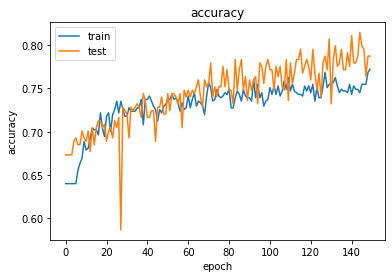

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

print(history.history.keys())
## val_loss, val_accuracy , loss , accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


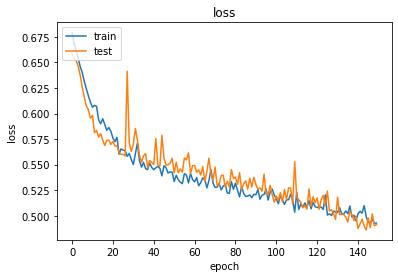

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

print(history.history.keys())
## val_loss, val_accuracy , loss , accuracy

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [61]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X,Y = make_moons(noise = 0.2, random_state =0, n_samples = 1000)
X = scale(X)
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size = .5)

[Text(0, 0.5, 'Y'), Text(0.5, 0, 'X'), Text(0.5, 1.0, 'binary classifiicaion')]

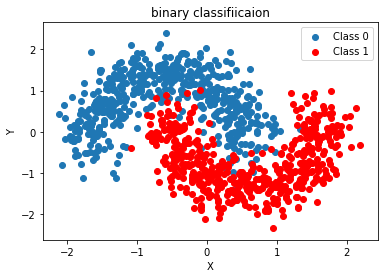

In [62]:
fig, ax = plt.subplots()
ax.scatter(X[Y == 0,0], X[Y == 0,1], label = 'Class 0')
ax.scatter(X[Y == 1,0], X[Y ==1,1], color = 'r', label = 'Class 1')
ax.legend()
ax.set(xlabel = 'X', ylabel = 'Y', title = 'binary classifiicaion')

In [63]:
# Callback class
# custom callback 함수의 제작
# 함수에 의해서 호출되는 객체 

class CustomHistory(keras.callbacks.Callback):   ## 상속
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
        
    def on_epoch_end(self, batch, logs = {}):  ## 오버라이딩 
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        

In [64]:
import keras
# 비선형 모델 - 신경망
model = Sequential()
# 행렬 연산의 규칙.  
model.add(Dense(32, input_dim = 2, activation = 'relu'))
# 1000 X2 , 2X32 --> 1000X32 2개로 설명할것을 32개로 설명한다. 
# 논리적으로보면 변수를 32개로 늘린것과 같다. 
model.add(Dense(1, activation = 'sigmoid'))
# 1000 X32 , 32X1 --> 1000X1 로 분류 
model.compile(optimizer = 'AdaDelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
tb_callback = keras.callbacks.TensorBoard( log_dir = './Graph/model_1/', histogram_freq = 100, 
                                         write_graph = True, write_images = False)
## callback함수는 window 자동으로 호출되는 함수. 
# graph 이미지를 출력할 준비를 해라. 
tb_callback.set_model(model) # 콜백을 모델에 등록해라. 

In [65]:
hist = model.fit(X_train, Y_train, batch_size = 32, epochs =200, verbose = 0, validation_data = (X_test, Y_test), callbacks = [tb_callback])

InvalidArgumentError: You must feed a value for placeholder tensor 'dense_17_input' with dtype float and shape [?,2]
	 [[node dense_17_input (defined at C:\Users\ICT01_15\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:736) ]]

Original stack trace for 'dense_17_input':
  File "C:\Users\ICT01_15\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\ICT01_15\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\ICT01_15\Anaconda3\lib\asyncio\base_events.py", line 534, in run_forever
    self._run_once()
  File "C:\Users\ICT01_15\Anaconda3\lib\asyncio\base_events.py", line 1771, in _run_once
    handle._run()
  File "C:\Users\ICT01_15\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-e32ab4ceae04>", line 5, in <module>
    model.add(Dense(32, input_dim = 2, activation = 'relu'))
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\keras\engine\sequential.py", line 162, in add
    name=layer.name + '_input')
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\keras\engine\input_layer.py", line 178, in Input
    input_tensor=tensor)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\keras\engine\input_layer.py", line 87, in __init__
    name=self.name)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py", line 736, in placeholder
    shape=shape, ndim=ndim, dtype=dtype, sparse=sparse, name=name)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\tensorflow\python\keras\backend.py", line 998, in placeholder
    x = array_ops.placeholder(dtype, shape=shape, name=name)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 2143, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 6261, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Users\ICT01_15\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
keras.utils.print_summary(model)

In [ ]:
keras.utils.plot_model(model)

In [ ]:
from keras.utils.vis_utils import model_to_dot
model_to_dot(model)

In [ ]:
from IPython.display import Image, SVG
SVG(model_to_dot(model).create(prog = 'dot', format = 'svg'))

In [ ]:
model.summary()
# param = 96--> 2X32 == 64 + bias(32개 )

In [ ]:
from keras.datasets import mnist
import matplotlib.pylab as plt
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)


In [ ]:
plt.imshow(X_train0[0])
plt.grid(False)
plt.show()

In [ ]:
# fully-connected: fltten : FFNN은 데이터가 한줄로 
# 이미지 정규화는 0에서부터 255까지의 컬러 값을 가지므로 255.0으로 나누어줘야한다. 
# 
X_train = X_train0.reshape(60000, 784).astype('float32')/255.0
X_test = X_test0.reshape(10000,784).astype('float32')/255.0
print(X_train.shape, X_train.dtype)

In [ ]:
y_train0[:5]

In [ ]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

In [ ]:
import numpy as np
from keras.optimizers import SGD
np.random.seed(0)
model = Sequential()

# 60000 X 784  784X 15  ==> 60000X15
model.add(Dense(512, input_dim = 784, activation = 'sigmoid'))
model.add(Dense(15))
# 60000X15 15 X 10 ==> 60000 X10 
model.add(Dense(10, activation = 'sigmoid'))
model.compile(optimizer = SGD(lr = 0.2), loss = 'mse', metrics = ['accuracy'])
## lr == learning rate 
## SGD == 확률적 경사하강법


In [ ]:
model.layers

In [ ]:
l1 = model.layers[0]
l2 = model.layers[1]

l1.name
l1.input_shape
l1.output_shape
l1.activation

In [ ]:


custom_hist = CustomHistory()
custom_hist.init()
hist = model.fit(X_train, Y_train, nb_epoch = 30, 
                 batch_size =100, validation_data = (X_test, Y_test), callbacks = [custom_hist] ,verbose = 2)
plt.plot(hist.history['loss'])
plt.show()

In [ ]:
plt.plot(hist.history['accuracy'], 'b-', label = 'training')
plt.plot(hist.history['val_accuracy'], 'r:', label = 'test')
plt.legend()
plt.show()

print(hist.model)
print(hist.params)
print(hist.history['accuracy'])
print(hist.history['val_accuracy'][29])
plt.show()
plt.plot(custom_hist.train_loss, 'y' , label = 'train loss')
plt.show()

In [ ]:
# answp X_test의 이미지 한장의 label을 예측해 보시오 

# 앞에서 모델을 전부 만들어 진다. 
model.predict(X_test[:1,:])

In [ ]:
model.predict_classes(X_test[:1, :], verbose = 0)

In [ ]:
# 출력차수가 512인 레이어를 추가히시오

In [ ]:
from keras.datasets import boston_housing
(x_train,y_train), (x_test, y_test) = boston_housing.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

## 이넘으로 보스턴 집값 예측 ㄱㄱ

In [ ]:
model = Sequential()
num_features = 13
model.add(Dense(1, input_dim = num_features, activation = 'linear'))


In [ ]:
model.summary()
model.compile(optimizer = 'rmsprop',loss = 'mse', metrics = ['mae'] )
model.fit(x_train, y_train, batch_size = 1, epochs = 10, verbose = 1)


In [ ]:
mse, mae = model.evaluate(x_test, y_test, verbose = False)
rmse = np.sqrt(mse)
mse,rmse, mae

In [ ]:
# x_test의 3장을 예측해보시오
pred = model.predict(x_test[:3,:])
real = y_test[:3]
print(model.predict(x_test[:3,:]))
print('실제집값 :', y_test[:3])


In [ ]:
pred =pred.reshape(3)


In [ ]:
import numpy as np
np.corrcoef(pred,real)

In [ ]:
#scikits -- keras 를 연결: kerasclassifier, kerasRegressor
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
#768 x 9=>768,8 독립변수,   768,1 종속변수
#입력 8개 
def create_model():
    model = Sequential()
    #8 x 12 => 768 x 12=>
    model.add(Dense(12, input_dim=8, activation="relu"))
    #768 x 12=>768 X 1
    model.add(Dense(1, activation="sigmoid")) #0~1
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

seed = 7
numpy.random.seed(seed)
dataset = numpy.loadtxt("pima.csv", delimiter=",")
print(dataset.shape)
X = dataset[:, 0:8]
Y = dataset[:, 8] #종속변수 1개
model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
#파라미터 조합
batch_size=[10,20,40,60,80,100]
epochs=[10,50,100]

#매개변수입력 형태는 dictionary
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1) #참여하는 cpu 개수 -1: 다 참여
grid_result=grid.fit(X,Y)
print('최적스코어:%f 사용한 파라미터조합: %s'%(
grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print('%f (%f) with:%r' % (mean,stdev,param))

In [ ]:
#Dense2:가중치 초기화 (kernel_initializer)매개변수를 넣고 이를 테스트 해서 가장 최적의 가중치 초기화 파라미터
#를 결정하시오


#Dense1:activation 함수를 달아주고

#의 조합중 가장 좋은 activation 함수를 결정하시오